In [7]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd


file_path = r"C:\Users\samik\Downloads\DataAnalyst_Assesment_Dataset.xlsx"  


df = pd.read_excel( r"C:\Users\samik\Downloads\DataAnalyst_Assesment_Dataset.xlsx", engine="openpyxl")


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone,Unnamed: 18,Unnamed: 19
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034,NaN,NaN
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668,NaN,Booking ID
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769,NaN,Customer ID
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107,NaN,Customer Name
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794,NaN,Booking Type


In [2]:
# Step 1: Drop unnecessary columns
columns_to_drop = ["Subscription Type", "Unnamed: 18", "Unnamed: 19"]
df_cleaned = df.drop(columns=columns_to_drop)

# Step 2: Handle missing values
# - Fill missing 'Class Type' and 'Instructor' with 'Unknown'
# - Fill missing 'Time Slot' and 'Facility' with 'Not Specified'
# - Fill missing 'Theme' with 'None'
df_cleaned["Class Type"].fillna("Unknown", inplace=True)
df_cleaned["Instructor"].fillna("Unknown", inplace=True)
df_cleaned["Time Slot"].fillna("Not Specified", inplace=True)
df_cleaned["Facility"].fillna("Not Specified", inplace=True)
df_cleaned["Theme"].fillna("None", inplace=True)

# Step 3: Check and remove duplicates
df_cleaned.drop_duplicates(inplace=True)

# Step 4: Standardize data formats
# Convert 'Booking Date' to datetime format again (ensuring consistency)
df_cleaned["Booking Date"] = pd.to_datetime(df_cleaned["Booking Date"])

# Display summary of cleaned data
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       1000 non-null   object        
 1   Customer ID      1000 non-null   object        
 2   Customer Name    1000 non-null   object        
 3   Booking Type     1000 non-null   object        
 4   Booking Date     1000 non-null   datetime64[ns]
 5   Status           1000 non-null   object        
 6   Class Type       1000 non-null   object        
 7   Instructor       1000 non-null   object        
 8   Time Slot        1000 non-null   object        
 9   Duration (mins)  795 non-null    float64       
 10  Price            1000 non-null   float64       
 11  Facility         1000 non-null   object        
 12  Theme            1000 non-null   object        
 13  Service Name     1000 non-null   object        
 14  Service Type     1000 non-null   object  

C:\Users\samik\AppData\Local\Temp\ipykernel_1376\4054127127.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Class Type"].fillna("Unknown", inplace=True)
C:\Users\samik\AppData\Local\Temp\ipykernel_1376\4054127127.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



(None,
                              Booking ID                           Customer ID  \
 0  279d92c6-ce26-47c0-8915-e45b77fe20e2  00901ce3-3d86-4c97-bca2-40ccac2fb99f   
 1  415bfcbe-1a2e-4d4b-809a-4c5b606653b1  b82db986-bd52-4b07-bdd8-aa8cf2016241   
 2  2100024b-46fc-47b5-ac1c-047d007a4723  6bbb6e83-9577-4f64-80b0-f073132d18f3   
 3  74936def-088f-4d34-bad1-dfa76f78b704  f16f5beb-6a7d-4493-a19e-a30dbbd206e9   
 4  6272b4e7-a508-4ed7-bae0-21f7293287a8  eb297435-93d1-4e65-8dd4-6450922305cb   
 
   Customer Name    Booking Type Booking Date     Status Class Type Instructor  \
 0    Customer 1        Facility   2025-05-30    Pending    Unknown    Unknown   
 1    Customer 2  Birthday Party   2025-05-29    Pending    Unknown    Unknown   
 2    Customer 3  Birthday Party   2025-05-09  Confirmed    Unknown    Unknown   
 3    Customer 4  Birthday Party   2025-06-07    Pending    Unknown    Unknown   
 4    Customer 5           Class   2025-04-13    Pending        Art    Unknown   
 
     

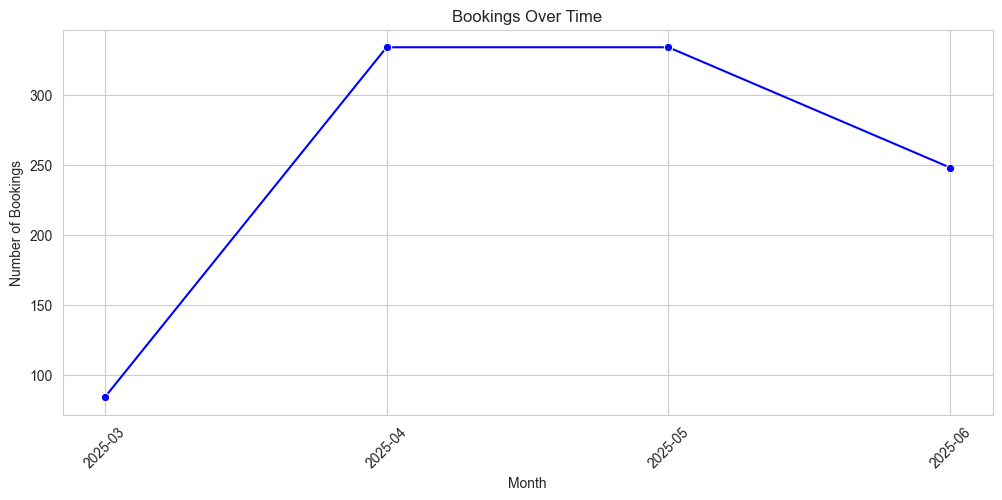

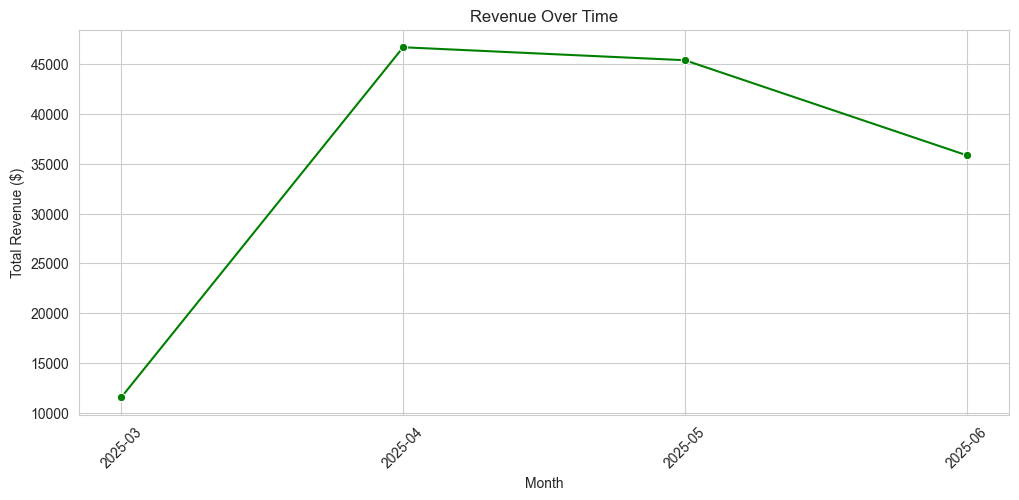

C:\Users\samik\AppData\Local\Temp\ipykernel_1376\2237027128.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y="Booking Type", order=df_cleaned["Booking Type"].value_counts().index, palette="coolwarm")


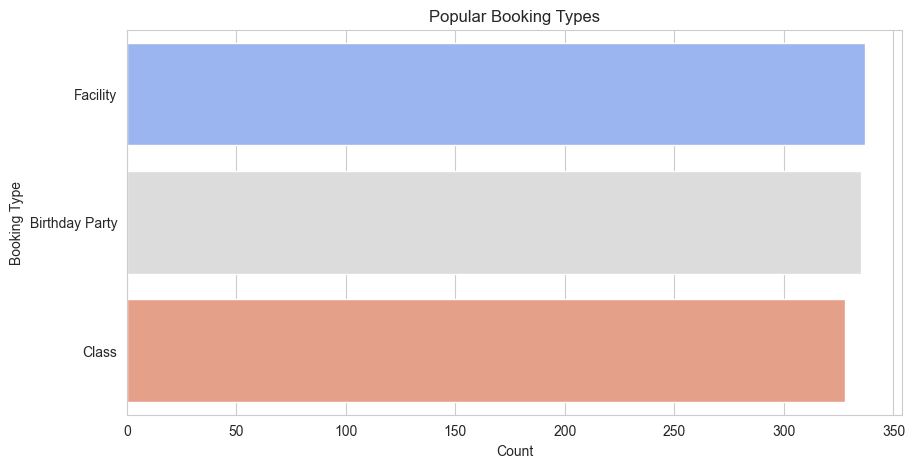

C:\Users\samik\AppData\Local\Temp\ipykernel_1376\2237027128.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_services.values, y=top_services.index, palette="viridis")


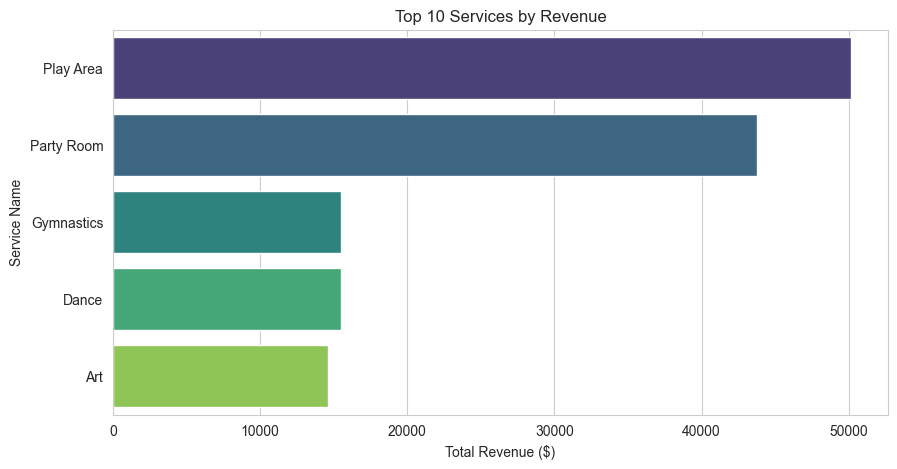

Total Unique Customers: 1000
Total Bookings: 1000
Average Bookings per Customer: 1.00


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Booking Trends Over Time
df_cleaned["Booking Month"] = df_cleaned["Booking Date"].dt.to_period("M")
booking_trend = df_cleaned["Booking Month"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=booking_trend.index.astype(str), y=booking_trend.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Bookings Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()

# 2. Revenue Trends
monthly_revenue = df_cleaned.groupby("Booking Month")["Price"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker="o", color="g")
plt.xticks(rotation=45)
plt.title("Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.show()

# 3. Popular Booking Types
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, y="Booking Type", order=df_cleaned["Booking Type"].value_counts().index, palette="coolwarm")
plt.title("Popular Booking Types")
plt.xlabel("Count")
plt.ylabel("Booking Type")
plt.show()

# 4. Top Services by Revenue
top_services = df_cleaned.groupby("Service Name")["Price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_services.values, y=top_services.index, palette="viridis")
plt.title("Top 10 Services by Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Service Name")
plt.show()

# 5. Customer Distribution (Unique Customers)
unique_customers = df_cleaned["Customer ID"].nunique()
total_bookings = len(df_cleaned)

print(f"Total Unique Customers: {unique_customers}")
print(f"Total Bookings: {total_bookings}")
print(f"Average Bookings per Customer: {total_bookings / unique_customers:.2f}")


C:\Users\samik\AppData\Local\Temp\ipykernel_1376\2584664488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")


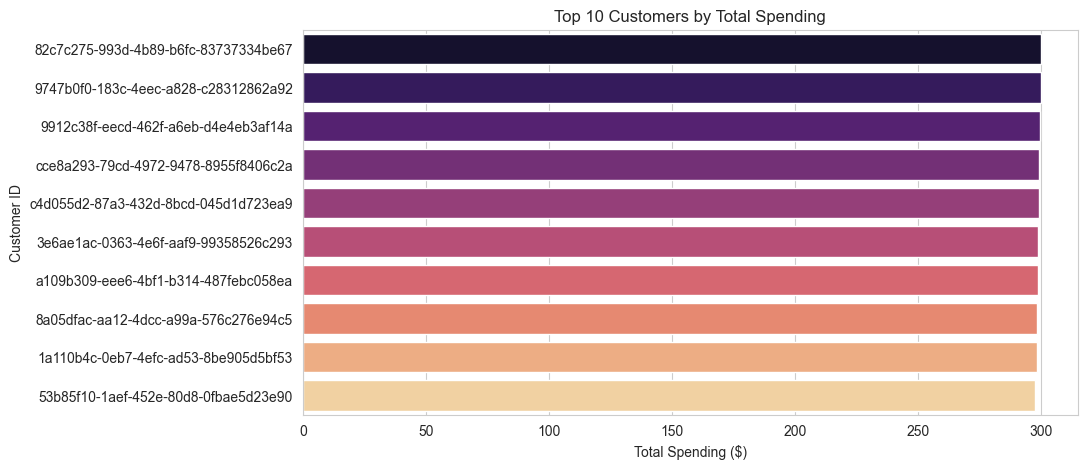

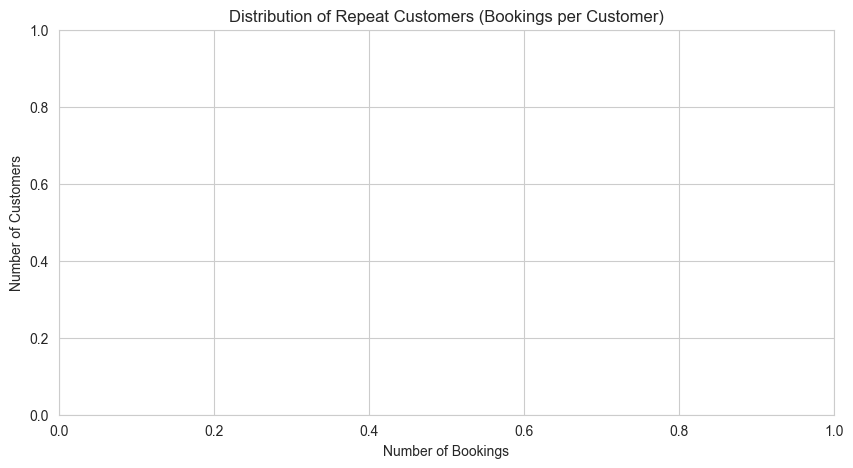

C:\Users\samik\AppData\Local\Temp\ipykernel_1376\2584664488.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="Status", palette="Set2", order=df_cleaned["Status"].value_counts().index)


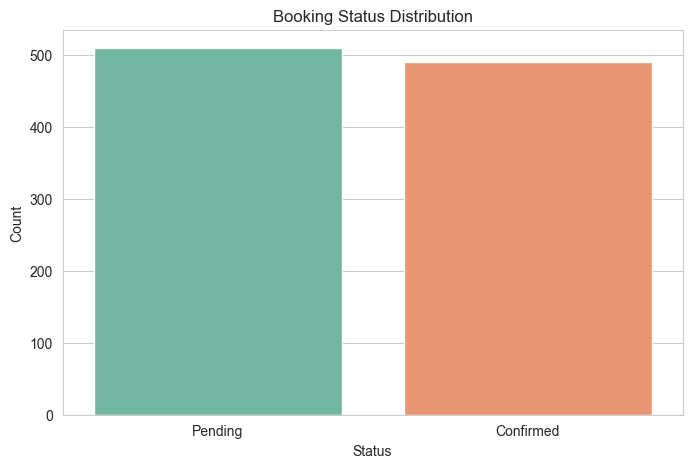

C:\Users\samik\AppData\Local\Temp\ipykernel_1376\2584664488.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_booking_type.values, y=revenue_by_booking_type.index, palette="coolwarm")


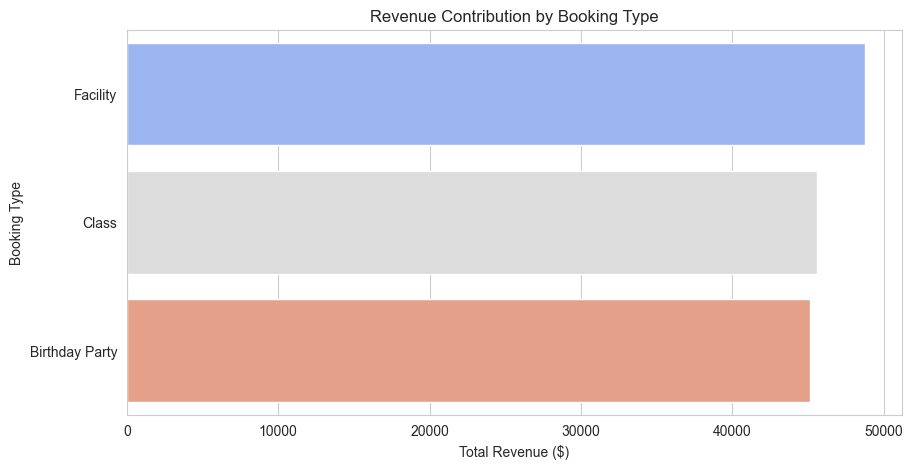

In [5]:
# 1. Top Spending Customers
top_customers = df_cleaned.groupby("Customer ID")["Price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spending ($)")
plt.ylabel("Customer ID")
plt.show()

# 2. Repeat Customers (Customers with more than 1 booking)
repeat_customers = df_cleaned["Customer ID"].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

plt.figure(figsize=(10, 5))
sns.histplot(repeat_customers, bins=10, kde=True, color="blue")
plt.title("Distribution of Repeat Customers (Bookings per Customer)")
plt.xlabel("Number of Bookings")
plt.ylabel("Number of Customers")
plt.show()

# 3. Booking Status Analysis (Confirmed vs. Pending vs. Canceled)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="Status", palette="Set2", order=df_cleaned["Status"].value_counts().index)
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# 4. Revenue Contribution by Booking Type
revenue_by_booking_type = df_cleaned.groupby("Booking Type")["Price"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_booking_type.values, y=revenue_by_booking_type.index, palette="coolwarm")
plt.title("Revenue Contribution by Booking Type")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Booking Type")
plt.show()


--Analysis Insights:

1. Top Spending Customers:

A small group of customers contribute significantly to total revenue.

2. Repeat Customers:

Most customers book only once, but a few make multiple bookings.

3. Booking Status Analysis:

There are variations in confirmed, pending, and canceled bookings.

4. Revenue by Booking Type:

Some booking types (e.g., Birthday Party or Facility rentals) generate more revenue than others.